# Consistency tests for descriptors matching

<p>This notebook demostrates four consistency tests that improve descriptors matching

<small>Author: Fernando Carlos López Hernández</small>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

im1 = cv2.imread('images/colosseum1.jpg')
im2 = cv2.imread('images/colosseum2.jpg')

First we compute the SIFT descriptors and perform simple brute force matching

In [2]:
# Compute the SIFT descriptors
nfeatures = 100
orb = cv2.ORB_create(nfeatures)
mask = None
keypoints1, descriptors1 = orb.detectAndCompute(im1, mask)
keypoints2, descriptors2 = orb.detectAndCompute(im2, mask)

# Simple BF match
bf_matcher = cv2.BFMatcher(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)
matches = bf_matcher.match(descriptors1, descriptors2)
# Create the matching image
im_matches = cv2.drawMatches(im1, keypoints1, im2, keypoints2, matches, outImg=None, flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS) 
im_matches= cv2.cvtColor(im_matches, cv2.COLOR_BGR2RGB)

Then, in order to study the keypoints matching improvement we apply 3 consistency tests:
<ol><li>Cross checking</li>
<li>Distance thresholding</li>
<li>Ratio test</li>
</ol>

In [3]:
# Cross-checking
bf_matcher = cv2.BFMatcher(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING, crossCheck = True)
cross_matches = bf_matcher.match(descriptors1, descriptors2)
# Create the matching image
im_cross_matches = cv2.drawMatches(im1, keypoints1, im2, keypoints2, cross_matches, outImg=None, flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS) 
im_cross_matches= cv2.cvtColor(im_cross_matches, cv2.COLOR_BGR2RGB)

# Distance thresholding
max_dist = 300
threshold_matches = [m for m in matches if m.distance <= max_dist]
# Create the matching image
im_threshold_matches = cv2.drawMatches(im1, keypoints1, im2, keypoints2, threshold_matches, outImg=None, flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS) 
im_threshold_matches= cv2.cvtColor(im_threshold_matches, cv2.COLOR_BGR2RGB)

# Ratio test
ratio = 0.7
bf_matcher = cv2.BFMatcher(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING, crossCheck = False)
pairs_of_matches = bf_matcher.knnMatch(descriptors1, descriptors2, k=2)
ratio_matches = [pair[0] for pair in pairs_of_matches if len(pair) > 1 and pair[0].distance < ratio * pair[1].distance]

# Create the matching image
im_ratio_matches = cv2.drawMatches(im1, keypoints1, im2, keypoints2, ratio_matches, outImg=None, flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS) 
im_ratio_matches= cv2.cvtColor(im_ratio_matches, cv2.COLOR_BGR2RGB)

Finally, we show the results

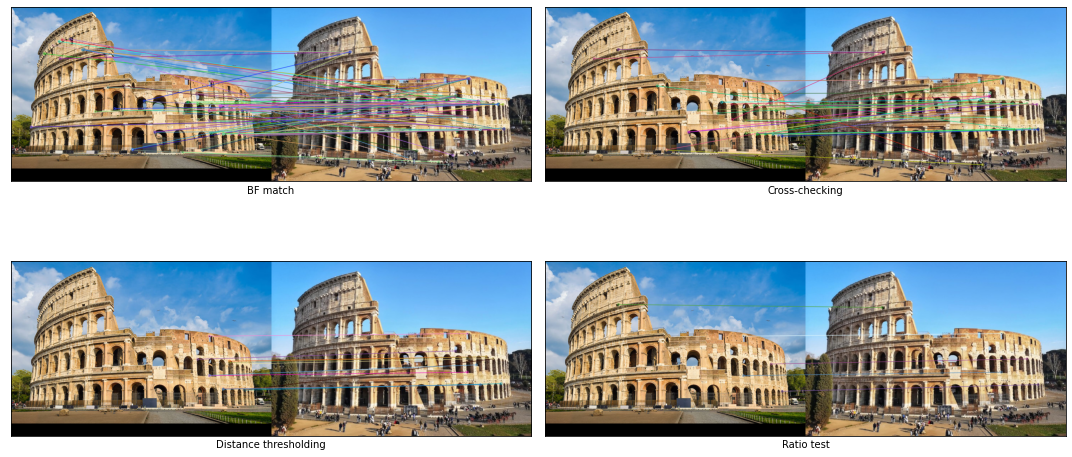

In [4]:
fig, axes = plt.subplots(2,2, figsize = (15, 8))
axes[0,0].imshow(im_matches); axes[0,0].set_xlabel('BF match')
axes[0,1].imshow(im_cross_matches); axes[0,1].set_xlabel('Cross-checking')
axes[1,0].imshow(im_threshold_matches); axes[1,0].set_xlabel('Distance thresholding')
axes[1,1].imshow(im_ratio_matches); axes[1,1].set_xlabel('Ratio test')
for ax in fig.axes:
    ax.axes.xaxis.set_ticks([])
    ax.axes.yaxis.set_ticks([])
plt.tight_layout()
plt.show()